Imports

In [1]:
from dag_blockchain import DAGBlockchain
from blockchain_utils import BlockchainUtils
import block
from pubsub import pub
from node import Node
from transaction import Transaction
from sensor_transaction import SensorTransaction
from transaction_pool import TransactionPool
from wallet import Wallet
from Crypto.PublicKey import RSA
import pprint
import random
import time


Creating genesis block

In [2]:
nodes = []  # list of all nodes
blockchain_dimensions = 4
genesis_node_id = 1 # int(num_nodes/2)

for i in range(2):
    new_node = Node(i+1, 0, 1)
    new_node.start_listener('c0')
    nodes.append(new_node)
genesis_forger = nodes[genesis_node_id-1].wallet.public_key_string()
print(genesis_forger)

-----BEGIN PUBLIC KEY-----
MIIBIjANBgkqhkiG9w0BAQEFAAOCAQ8AMIIBCgKCAQEAj8N2rl2x2U6DByOHOP8T
IP2PuEP3Us5WJk70x5pURfvMbUonr1HzxYVztxyjgEHK8trqSraRafUHlfoWZyO4
0/Y347J8K1VDsU5CDvD4rHDJKOLyjpI7K1pUVhZOhHO0Lck63x6IVeY5UovG/PrP
paEuUp+2CA2xOG4DutUuQqkngjeo4+ggrv92pnLcr7mVqcpvEz9i5w4KR1cwe6kL
DRdMtK0uS9b+4hBmlVhqhHAv5Nf2fWk4wGjqpoUhWEFuML1uymU37/JbudrrSVTO
awMLDBRmcJ4Tp2nC0v6kw/inp7pQlJgzZTULRVswfpTNO6EIfV0Svx/mAmyPYXCT
dwIDAQAB
-----END PUBLIC KEY-----


Creating first DAG Blockchain

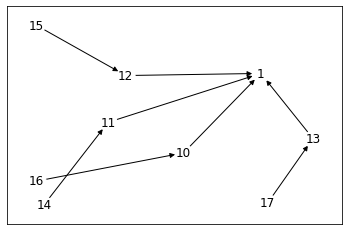

In [3]:
dag_blockchain = DAGBlockchain(blockchain_dimensions, genesis_node_id, genesis_forger)    

# adding 8 blocks w/ random locations
block1 = block.Block([], 10, 25, 25, genesis_forger)
block2 = block.Block([], 11, 25, 75, genesis_forger)
block3 = block.Block([], 12, 75, 75, genesis_forger)
block4 = block.Block([], 13, 75, 25, genesis_forger)
block5 = block.Block([], 14, 5, 80, genesis_forger)
block6 = block.Block([], 15, 60, 60, genesis_forger)
block7 = block.Block([], 16, 40, 10, genesis_forger)
block8 = block.Block([], 17, 70, 20, genesis_forger)

dag_blockchain.add_block(block1)
dag_blockchain.add_block(block2)
dag_blockchain.add_block(block3)
dag_blockchain.add_block(block4)
dag_blockchain.add_block(block5)
dag_blockchain.add_block(block6)
dag_blockchain.add_block(block7)
dag_blockchain.add_block(block8)

dag_blockchain.visualize("")

Creating a Second DAG Blockchain

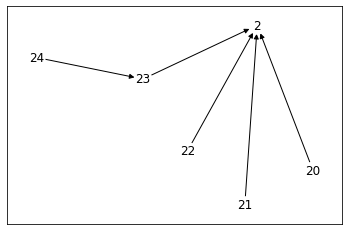

In [4]:
genesis_forger2 = nodes[genesis_node_id-2].wallet.public_key_string()
dag_blockchain2 = DAGBlockchain(blockchain_dimensions, 2, genesis_forger2)

block10 = block.Block([], 20, 20, 30, genesis_forger2)
block11 = block.Block([], 21, 60, 60, genesis_forger2)
block12 = block.Block([], 22, 60, 30, genesis_forger2)
block13 = block.Block([], 23, 40, 65, genesis_forger2)
block14 = block.Block([], 24, 45, 66, genesis_forger2)

dag_blockchain2.add_block(block10)
dag_blockchain2.add_block(block11)
dag_blockchain2.add_block(block12)
dag_blockchain2.add_block(block13)
dag_blockchain2.add_block(block14)

dag_blockchain2.visualize("")

Merging two DAG blockchains

time to merge: 0.0020351409912109375


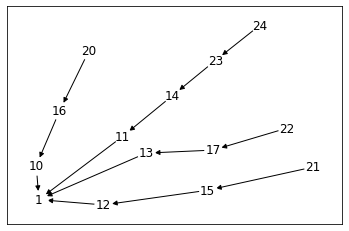

In [5]:
merge_time = time.time()
dag_blockchain.merge(dag_blockchain2)
print(f'time to merge: {time.time() - merge_time}')
dag_blockchain.visualize("")

Helpful Methods in the DAG Blockchain:

In [8]:
print(f'downstream from genesis: {dag_blockchain.dag.predecessors(genesis_node_id)}')
print(f'all downstreams from genesis: {dag_blockchain.dag.all_predecessors(genesis_node_id)}')
print(f'predecessor from node 24: {dag_blockchain.dag.downstream(24)}')
print(f'all predecessors from node 24: {dag_blockchain.dag.all_downstreams2(24)}')
print(f'all independent nodes: {dag_blockchain.dag.all_leaves(dag_blockchain.dag.graph)}')
print(f'all leaves: {dag_blockchain.dag.ind_nodes(dag_blockchain.dag.graph)}')
print(dag_blockchain.dag.merkle_hash(block14))

downstream from genesis: [10, 11, 12, 13]
all downstreams from genesis: [10, 16, 11, 14, 12, 15, 13, 17]
predecessor from node 24: [23]
all predecessors from node 24: [23, 14, 11, 1]
all independent nodes: [1]
all leaves: [20, 21, 22, 24]
